In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"marziy","key":"be058d467fbe8a41ea12560640cf9c76"}'}

In [3]:
! ls -lha kaggle.json

-rw-r--r-- 1 root root 62 Apr  7 13:09 kaggle.json


In [4]:
! pip install -q kaggle

In [5]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 62 Apr  7 13:09 kaggle.json


In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!chmod 600 ~/.kaggle/kaggle.json


In [8]:
!kaggle datasets list

ref                                                                       title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/ankanhore545/cost-of-living-index-2022                           Cost of Living Index 2022                          176KB  2022-03-26 04:56:04           2094         28  1.0              
datasets/piterfm/2022-ukraine-russian-war                                 2022 Ukraine Russia War                              2KB  2022-04-07 09:53:48           5833        349  1.0              
datasets/kamilpytlak/personal-key-indicators-of-heart-disease             Personal Key Indicators of Heart Disease             3MB  2022-02-16 10:18:03           8813        192  1.0              
datasets/kuchhb

In [9]:
# !kaggle datasets download -d tongpython/cat-and-dog -p /content/drive/MyDrive/catdog

 99% 215M/218M [00:01<00:00, 158MB/s]
100% 218M/218M [00:01<00:00, 179MB/s]


In [10]:
%cd /content/drive/MyDrive/catdog/

/content/drive/MyDrive/catdog


In [11]:
!ls

cat-and-dog.zip


In [ ]:
!unzip cat-and-dog.zip

In [14]:
!ls


cat-and-dog.zip  test_set  training_set


In [15]:
import cv2

In [16]:
from google.colab.patches import cv2_imshow

In [17]:
import matplotlib.pyplot as plt

In [18]:
image = plt.imread('/content/drive/MyDrive/catdog/training_set/training_set/dogs/dog.1.jpg')

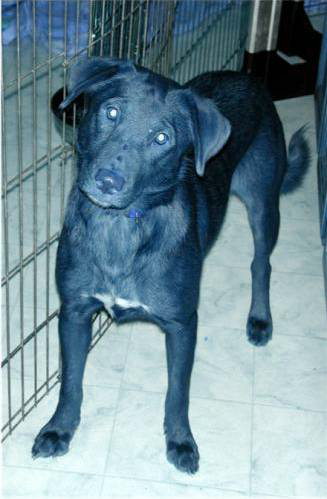

In [19]:
cv2_imshow(image)


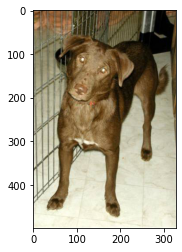

In [20]:
plt.imshow(image)

In [21]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPool2D

In [22]:
from keras.preprocessing.image import ImageDataGenerator

In [23]:
import os,shutil

In [65]:
base_dir='/content/drive/MyDrive/catdog'
train_dir='/content/drive/MyDrive/catdog/training_set/training_set'
test_dir='/content/drive/MyDrive/catdog/test_set/test_set'
val_dir = os.path.join(base_dir,'validation')
os.mkdir(val_dir)

In [57]:
cat_dir = os.path.join(val_dir,'cats')
os.mkdir(cat_dir)

In [58]:
dog_dir = os.path.join(val_dir,'dogs')
os.mkdir(dog_dir)

In [30]:
len(os.listdir('/content/drive/MyDrive/catdog/test_set/test_set/dogs'))

1013

In [31]:
len(os.listdir('/content/drive/MyDrive/catdog/training_set/training_set/dogs'))

4006

In [59]:
fnames = ['cat.{}.jpg'.format(i) for i in range(4500,4988)]

for fname in fnames:
    src = os.path.join(test_dir+'/cats', fname)
    dst = os.path.join(cat_dir, fname)
    shutil.move(src, dst)

In [60]:
fname = ['dog.{}.jpg'.format(i) for i in range(4500,4988)]
for fname in fname:
  sorc = os.path.join(test_dir+'/dogs/'+ fname)
  dest = os.path.join(dog_dir,fname)
  shutil.move(sorc,dest)

In [61]:
print('total validation cat images:', len(os.listdir(cat_dir)))
print('total validation dog images:', len(os.listdir(dog_dir)))

total validation cat images: 488
total validation dog images: 488


# data generator

In [63]:
train_gen = ImageDataGenerator(rescale=1./255)

In [64]:
eval_gen = ImageDataGenerator (rescale=1./255)

In [68]:
train_generator = train_gen.flow_from_directory(train_dir,
                                                target_size = (150,150),
                                                class_mode='binary',
                                                batch_size=20
)

Found 8005 images belonging to 2 classes.


In [86]:
eval_generator = eval_gen.flow_from_directory(val_dir,
                                                target_size = (150,150),
                                                class_mode='binary',
                                                batch_size=20
)

Found 976 images belonging to 2 classes.


In [94]:
from keras import layers
from keras import models

In [104]:
model = models.Sequential()

In [105]:
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))


In [107]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [ ]:
model.fit_generator(train_generator,steps_per_epoch=50, epochs=50, validation_data=eval_generator, validation_steps=25)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/50
50/50 [==============================] - 55s 1s/step - loss: 0.7008 - acc: 0.5140 - val_loss: 0.6887 - val_acc: 0.6360
Epoch 2/50
50/50 [==============================] - 53s 1s/step - loss: 0.6921 - acc: 0.5340 - val_loss: 0.6908 - val_acc: 0.5060
Epoch 3/50
50/50 [==============================] - 53s 1s/step - loss: 0.6920 - acc: 0.5220 - val_loss: 0.6761 - val_acc: 0.6380
Epoch 4/50
50/50 [==============================] - 53s 1s/step - loss: 0.6776 - acc: 0.5560 - val_loss: 0.7049 - val_acc: 0.5120
Epoch 5/50
50/50 [==============================] - 53s 1s/step - loss: 0.6949 - acc: 0.5300 - val_loss: 0.6773 - val_acc: 0.5720
Epoch 6/50
50/50 [==============================] - 53s 1s/step - loss: 0.6510 - acc: 0.5850 - val_loss: 0.6599 - val_acc: 0.5820
Epoch 7/50
50/50 [==============================] - 53s 1s/step - loss: 0.6680 - acc: 0.5670 - val_loss: 0.6793 - val_acc: 0.5140
Epoch 8/50
50/50 [==============================] - 53s 1s/step - loss: 0.6919 - acc: 0.54

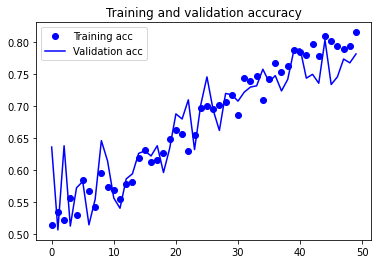

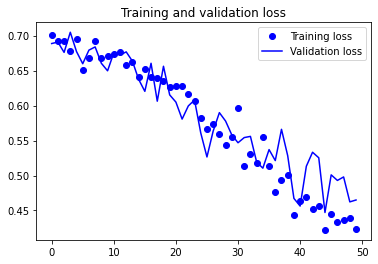

In [111]:
acc = model.history.history['acc']
val_acc = model.history.history['val_acc']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [112]:
model.save('cat_dog1.h5')